# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("~/Downloads/Country-data.csv", sep = ",")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
names = df[["country"]].copy()
X=df.drop(["country"],axis = 1)

In [4]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [5]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)


# 2.) Pick two features to visualize across

In [6]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

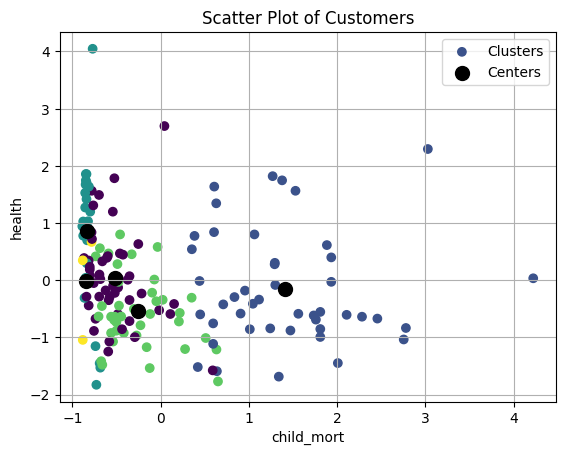

In [8]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 2


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [15]:
WCSS = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

In [16]:
WCSS

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 759.9928936474814,
 655.3096705351536,
 550.9785252568715,
 561.9268487720021,
 502.35164928527144,
 451.9174178512615,
 429.4546297883621,
 409.5705950892837,
 365.34154182234454,
 342.62828279325475,
 345.1906092207398]

In [17]:
#BONUS OPTIONAL (ONE LINER CODE)
WCSS = [KMeans(n_clusters=k, n_init=30, init="random").fit(X_scaled).inertia_ for k in range(1, 15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

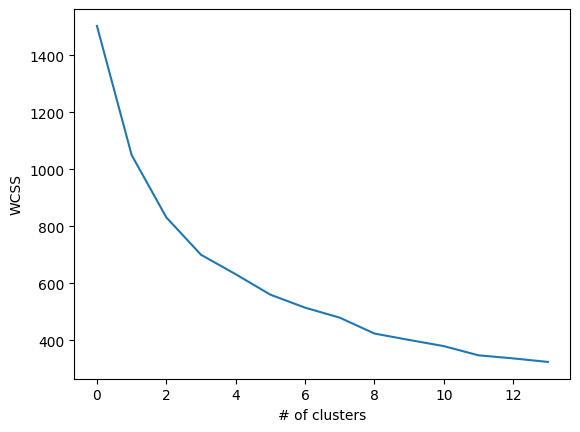

In [18]:
plt.plot(WCSS)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

# 6.) Do the same for a silhoutte plot

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
SS=[]
Ks = range(2,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    labs = kmeans.labels_
    sil = silhouette_score(X_scaled,labs)
    SS.append(sil)

SS


[0.287356689214067,
 0.28329575683463126,
 0.303676957667828,
 0.3060544006436598,
 0.2392216633878332,
 0.2476932062736242,
 0.24315042599354764,
 0.2023247997159316,
 0.20911961406379764,
 0.20965287090599416,
 0.19719319218201245,
 0.2095082817039416,
 0.18856062809818092]

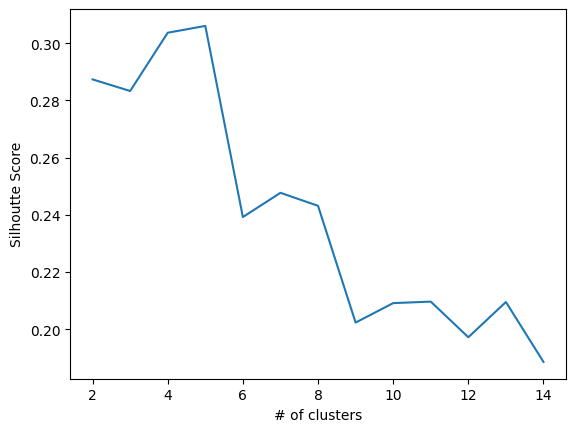

In [21]:
plt.plot(Ks, SS)
plt.ylabel("Silhoutte Score")
plt.xlabel("# of clusters")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [22]:
kmeans = KMeans(n_clusters=2, n_init=30, init="random").fit(X_scaled)

In [23]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
preds

,0
0,1
1,0
2,0
3,1
4,0
...,...
162,1
163,0
164,0
165,1


In [24]:
output = pd.concat([preds,df], axis = 1)
output.rename(columns = {0:"Clusters"},inplace=True)
output

,Clusters,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [25]:
#to print all countries in clusters 0
print("Clusters 0: ")
list(output.loc[output["Clusters"]==0, "country"])

Clusters 0: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [26]:
#to print all countries in clusters 1
print("Clusters 1: ")
list(output.loc[output["Clusters"]==1, "country"])

Clusters 1: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [27]:
#### Write an observation

#8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [28]:
numeric_cols = output.select_dtypes(include=[np.number]).drop(columns = ["Clusters"])
numeric_cols.groupby(output["Clusters"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [29]:
numeric_cols.groupby(output["Clusters"]).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


In [30]:
numeric_cols.groupby(output["Clusters"]).describe()

child_mort                                                          \
              count       mean        std   min   25%   50%      75%    max   
Clusters                                                                      
0              99.0  12.161616   8.523122   2.6   4.7  10.3   17.300   42.7   
1              68.0  76.280882  38.076068  17.4  48.8  65.6  100.025  208.0   

         exports             ... total_fer        gdpp                \
           count       mean  ...       75%   max count          mean   
Clusters                     ...                                       
0           99.0  48.603030  ...    2.2000  3.66  99.0  20507.979798   
1           68.0  30.198515  ...    5.3175  7.49  68.0   1981.235294   

                                                                     
                   std     min      25%      50%      75%       max  
Clusters                                                             
0         20578.727127  1310.0  5430.00  11900.0  32250.0  105000.0  
1          2528.509189   231.0   594.25   1155.0   2672.5   17100.0  

[2 rows x 72 columns]

# 9.) Write an observation about the descriptive statistics.

We may determine information about the developmental state of the nations in the dataset by comparing the mean and standard deviation of the features in Clusters 0 and 1. Cluster 0 represents a lower-income and developing state, as evidenced by its heightened inflation rate, lower GDP mean, and higher child mortality rate. Nonetheless, there is variation in child mortality rates within Cluster 0, indicating different conditions in each of the nations.

In contrast, Cluster 1 indicates a more developed and successful state with a lower mean child mortality rate, lower inflation, and a higher GDP. However, there is more variation in GDP and income levels within Cluster 1, indicating a variety of economic situations.

It is noteworthy that the dataset seems to be out of current. Notably, several of the nations in Cluster 0 are currently performing better on these metrics than those in Cluster 1, while some of the countries in Cluster 1 are struggling economically and are performing worse than those in Cluster 0. This emphasizes how socioeconomic conditions are changing and how good evaluations require current information.